# Crime and Punishment, by Fyodor Dostoyevski
# Analysis using NLP techniques
Text of the novel made available by [Project Gutenberg](http://www.gutenberg.org/catalog/)

## Import dependencies

In [104]:
import requests
from nltk import word_tokenize, download, Text, FreqDist

## Download NLTK package `punkt` for `word_tokenize`

In [22]:
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /home/stepan/snap/jupyter/6/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

## Download e-book from Project Gutenberg

In [2]:
url = "http://www.gutenberg.org/files/2554/2554-0.txt"
response = requests.get(url)
response.encoding

'ISO-8859-1'

In [5]:
book = response.text
type(book)

str

In [6]:
len(book)

1201735

In [16]:
book[:393]

'ï»¿The Project Gutenberg EBook of Crime and Punishment, by Fyodor Dostoevsky\r\n\r\nThis eBook is for the use of anyone anywhere at no cost and with\r\nalmost no restrictions whatsoever.  You may copy it, give it away or\r\nre-use it under the terms of the Project Gutenberg License included\r\nwith this eBook or online at www.gutenberg.org\r\n\r\n\r\nTitle: Crime and Punishment\r\n\r\nAuthor: Fyodor Dostoevsky'

## Tokenize text

In [23]:
tokens = word_tokenize(book)
len(tokens)

244761

In [27]:
tokens[:14]

['ï',
 '»',
 '¿The',
 'Project',
 'Gutenberg',
 'EBook',
 'of',
 'Crime',
 'and',
 'Punishment',
 ',',
 'by',
 'Fyodor',
 'Dostoevsky']

## Create NLTK text from list of tokens

In [29]:
text = Text(tokens)
type(text)

nltk.text.Text

## Lexical dispersion plot

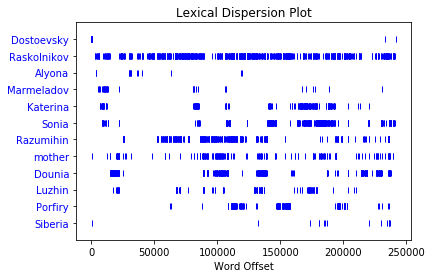

In [127]:
text.dispersion_plot(['Dostoevsky', 'Raskolnikov', 'Alyona', 'Marmeladov', 
                      'Katerina', 'Sonia', 'Razumihin', 'mother', 'Dounia', 'Luzhin', 
                      'Porfiry', 'Siberia'])

## Generate random text

In [71]:
text.generate()

Building ngram index...


it ! , that a month ago Mr. Lebeziatnikov appeared at the hands of the
room . and not to be bound , for Dmitri and Nikolay ran out into the
street . At last , agitated and apparently calm voice ( though I was
sitting at the spot , repay me for a long while trying to comfort them
and had succumbed quite by accident . to help me with aversion ?
Raskolnikovâs laughter . garden , he had thought of something . .
day . Even the old woman was only twenty-three . âBeat ? in the
house


'it ! , that a month ago Mr. Lebeziatnikov appeared at the hands of the\nroom . and not to be bound , for Dmitri and Nikolay ran out into the\nstreet . At last , agitated and apparently calm voice ( though I was\nsitting at the spot , repay me for a long while trying to comfort them\nand had succumbed quite by accident . to help me with aversion ?\nRaskolnikovâ\x80\x99s laughter . garden , he had thought of something . .\nday . Even the old woman was only twenty-three . â\x80\x9cBeat ? in the\nhouse'

## Examining context

In [86]:
text.concordance('mother')

Displaying 25 of 181 matches:
 in only two rooms . The father and mother spent their evenings in reading alo
frightened face , were watching her mother with alarm . Marmeladov did not ent
rought him . That was it : from his mother , from the province of R -- -- . He
ing , so dear and familiar , of the mother who had once taught him to read and
 . âMy dear Rodya , â wrote his mother -- âitâs two months since I las
e triumph of his decision . âNo , mother , no , Dounia , you wonât deceive
r prayers were like before the Holy Mother of Kazan who stands in motherâs b
 of our most rising generation , as mother writes , and who _seems_ to be kind
 ... But I should like to know why mother has written to me about âour most
struck her as rude _a little_ , and mother in her simplicity took her observat
, you are everything to us.â Oh , mother ! â His bitterness grew more and 
fter that ! But his _bride_ and her mother are to drive in a peasantâs cart 
.. . And you must be a

In [87]:
text.concordance('Alyona')

Displaying 15 of 15 matches:
ch will you give me for the watch , Alyona Ivanovna ? â âYou come with suc
ou something else in a day or two , Alyona Ivanovna -- a valuable thing -- sil
 You are too quick ... . Good-day , Alyona Ivanovna.â Raskolnikov went out i
nger sister of the old pawnbroker , Alyona Ivanovna , whom Raskolnikov had vis
 word , what a fright you are in of Alyona Ivanovna , â gabbled the huckster
But this time donât say a word to Alyona Ivanovna , â her husband interrup
ersation to give him the address of Alyona Ivanovna , the old pawnbroker , in 
ntion to the officer the pawnbroker Alyona Ivanovna and give him her address .
ng his friend various details about Alyona Ivanovna . âShe is first-rate , â
pen eyes at him . âGood evening , Alyona Ivanovna , â he began , trying to
t ? What do you want ? â âWhy , Alyona Ivanovna , you know me ... Raskolni
 bawled in a thick voice , âHey , Alyona Ivanovna , old witch ! Lizaveta Iva
y I heard that someone 

In [88]:
text.similar('mother')

face mind room and father heart head that eyes hand sister money but
brother life wife hands way illness letter


In [92]:
text.similar('agitated')

words in only two met informed now lost still time stairs insufferable
noticed really bring evident alone struck anxious caught


In [103]:
text.common_contexts(['Raskolnikov', 'Porfiry'])

that_had whom_had but_was at_who that_was to_do but_did on_and
seeing_and you_began to_had


## Lexical diversity

In [72]:
len(text)

244761

In [83]:
len(set(text))

12446

In [84]:
len(set(text)) / len(text)

0.05084960430787585

## Term frequency distribution

In [106]:
fdist = FreqDist(text)
print(fdist)

<FreqDist with 12446 samples and 244761 outcomes>


In [107]:
fdist.most_common(50)

[(',', 16178),
 ('.', 9477),
 ('the', 7417),
 ('and', 6234),
 ('to', 5266),
 ('a', 4462),
 ('of', 3841),
 ('I', 3530),
 ('he', 3454),
 ('you', 3313),
 ('in', 3088),
 ('â\x80\x9d', 2888),
 ('that', 2806),
 ('was', 2799),
 ('it', 2626),
 ('!', 2364),
 ('?', 2275),
 ('his', 1998),
 ('at', 1944),
 ('...', 1767),
 ('her', 1766),
 ('not', 1755),
 ('with', 1722),
 ('for', 1589),
 ('had', 1573),
 ('him', 1565),
 ('on', 1430),
 ('is', 1387),
 ('all', 1225),
 ('she', 1206),
 ('He', 1149),
 ('as', 1146),
 ('be', 1126),
 ('have', 1108),
 ('but', 1103),
 (';', 1049),
 ('me', 1042),
 ('are', 834),
 ('so', 794),
 ('my', 738),
 ('Raskolnikov', 718),
 ('what', 717),
 ('from', 714),
 ('were', 704),
 ('out', 674),
 ('--', 667),
 ('up', 644),
 ('your', 633),
 ('this', 617),
 ('And', 608)]

/home/stepan/snap/jupyter/common/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/stepan/snap/jupyter/common/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 157 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/stepan/snap/jupyter/common/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/stepan/snap/jupyter/common/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 157 missing from current font.
  font.set_text(s, 0, flags=flags)


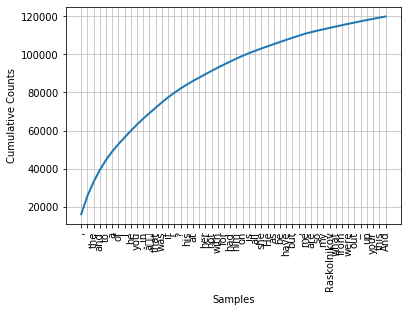

In [108]:
fdist.plot(50, cumulative=True)

In [110]:
V = set(text)
long_words = [w for w in V if len(w) > 15]
sorted(long_words)

['//gutenberg.org/license',
 '//pglaf.org/donate',
 '//pglaf.org/fundraising',
 '//www.gutenberg.org',
 '//www.gutenberg.org/2/5/5/2554/',
 'Alexandrovnaâ\x80\x99s',
 'Cough-cough-cough',
 'Gambrinusâ\x80\x99.â\x80\x9d',
 'Governor-General',
 'Gutenberg-tmâ\x80\x99s',
 'Kobilatnikovâ\x80\x99s',
 'Lebeziatnikovâ\x80\x99s',
 'Lippevechselâ\x80\x99s',
 'Schleswig-Holstein',
 'SvidrigaÃ¯lov.â\x80\x9d',
 'SvidrigaÃ¯lovsâ\x80\x99',
 'SvidrigaÃ¯lovâ\x80\x99s',
 '_Hof-kriegsrath_',
 '_Periodical_.â\x80\x9d',
 '_psychologically_',
 'burgomeister.â\x80\x9d',
 'circumstantially',
 'confectionerâ\x80\x99s',
 'conscience-prick',
 'cross-examination',
 'delicate-looking',
 'disproportionate',
 'disproportionately',
 'enthusiastically',
 'evil-intentioned',
 'frightened-looking',
 'governor-general',
 'grey-and-rainbow-coloured',
 'half-broken-down',
 'hallucination.â\x80\x9d',
 'horrible-looking',
 'impertinence.â\x80\x9d',
 'impracticality.â\x80\x9d',
 'indiscriminately',
 'indistinguishable',
 'me

In [114]:
!pip install -U https://github.com/nltk/nltk/archive/develop.zip

     / 3.1MB 1.2MB/s     - 2.3MB 1.2MB/s
  Using cached https://files.pythonhosted.org/packages/fc/1d/13cc7d174cd2d05808abac3f5fb37433e30c4cd93b152d2a9c09c926d7e8/regex-2019.11.1.tar.gz
  Using cached https://files.pythonhosted.org/packages/05/f2/764a5d530cf143ded9bc95216edb6e258c6554511e78de7c250557e8f3ed/tqdm-4.37.0-py2.py3-none-any.whl
  Stored in directory: /tmp/pip-ephem-wheel-cache-cyruqg7n/wheels/d4/95/12/d9607e211d0c92afa0e290377b076579de3c117271bbbe6855
  ERROR: Complete output from command /snap/jupyter/6/bin/python -u -c 'import setuptools, tokenize;__file__='"'"'/tmp/pip-install-n8rx_646/regex/setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d /tmp/pip-wheel-ayxctdba --python-tag cp37:
  ERROR: running bdist_wheel
  running build
  running build_py
  creating build
  creating build/lib.linux-x86_64-3.7
  creating build/lib.linux-x86_64-3

In [113]:
text.collocations()

ValueError: too many values to unpack (expected 2)

## Distribution of word length

In [116]:
fdist = FreqDist(len(w) for w in text)
print(fdist)

<FreqDist with 23 samples and 244761 outcomes>


In [117]:
fdist

FreqDist({3: 53893, 1: 40204, 4: 36529, 2: 36314, 5: 20639, 6: 16990, 7: 14644, 8: 9756, 9: 6321, 10: 4188, ...})

In [118]:
fdist.most_common()

[(3, 53893),
 (1, 40204),
 (4, 36529),
 (2, 36314),
 (5, 20639),
 (6, 16990),
 (7, 14644),
 (8, 9756),
 (9, 6321),
 (10, 4188),
 (11, 2617),
 (12, 1312),
 (13, 839),
 (14, 235),
 (15, 166),
 (16, 55),
 (17, 41),
 (18, 8),
 (19, 4),
 (20, 2),
 (23, 2),
 (25, 1),
 (31, 1)]

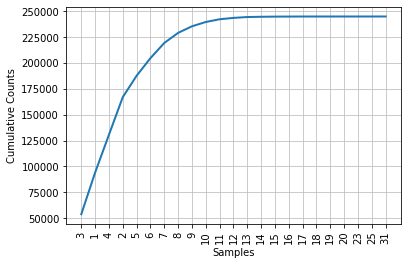

In [120]:
fdist.plot(cumulative=True)

## Names

In [132]:
names = sorted(w for w in set(text) if w.istitle() and len(w) > 5)
len(names)

626

In [133]:
names[:-60]

['Abraham',
 'Abroad',
 'Abruptly',
 'Academy',
 'According',
 'Achilles',
 'Across',
 'Additional',
 'Adrianople',
 'Afanasy',
 'Afanasyvitch',
 'Afraid',
 'Africa',
 'Afrosinya',
 'Afterwards',
 'Against',
 'Alexandr',
 'Alexandrovna',
 'Alexey',
 'Almighty',
 'Almost',
 'Although',
 'Altogether',
 'Alyona',
 'Alyoshka',
 'Amalia',
 'America',
 'American',
 'Andrey',
 'Aniska',
 'Another',
 'Answer',
 'Anxiety',
 'Anyhow',
 'Anyone',
 'Anything',
 'Anyway',
 'Appeal',
 'Archive',
 'Arkady',
 'Assuming',
 'Austrian',
 'Author',
 'Avdotya',
 'Bacchus',
 'Baring',
 'Barmherzige_',
 'Because',
 'Bedlam',
 'Before',
 'Behind',
 'Believe',
 'Believer',
 'Believest',
 'Bending',
 'Berlin_',
 'Beside',
 'Besides',
 'Bethany',
 'Better',
 'Bezzemelny',
 'Bickers',
 'Bigotry',
 'Bitter',
 'Bother',
 'Boulevard',
 'Bridge',
 'Brother',
 'Byelinsky',
 'Capitol',
 'Captain',
 'Carefully',
 'Cathedral',
 'Censorship',
 'Certain',
 'Certainly',
 'Character',
 'Children',
 'Christ',
 'Christian',
 '